In [1]:
from HSmodule import *
from source.SimHashDetection import SimHashDetection
from source.minHashDetection import MinHashDetection
from source.BloomDetection import BloomDetection
from source.FaissSearch import FaissSearch
from source.Preprocessor import *
import numpy as np
import pandas as pd

e:\DSA\Extended_assign\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 1. Đọc và chọn cột (làm lại từ đầu cho chắc)
df_large = pd.read_csv('dataset/dataset_small.csv')
df_large = df_large[['question1', 'question2']]

# 2. Nối 2 cột thành một Series
s = pd.concat([df_large['question1'], df_large['question2']])

# 3. DÙNG .dropna() ĐỂ XÓA TẤT CẢ GIÁ TRỊ RỖNG (NaN)
s_clean = s.dropna()

# 4. Bây giờ mới chuyển thành list
listText = s_clean.tolist()

# Bây giờ listText của bạn sẽ sạch và chỉ chứa chuỗi

In [ ]:
model1 = BloomDetection()
model2 = MinHashDetection()
model3 = SimHashDetection()
listModel = [model1, model2, model3]
model_names = ['BloomDetection', 'MinHashDetection', 'SimHashDetection']

Đo lường bộ nhớ khởi tạo của Model (Init Memory)...


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 2880aa82-d0a8-4d20-bf14-de3e4892e52a)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/multi-qa-MiniLM-L6-cos-v1/resolve/main/./modules.json
Retrying in 1s [Retry 1/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: e899030d-a7df-49e8-bc5d-7758de7cb283)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/multi-qa-MiniLM-L6-cos-v1/resolve/main/./modules.json
Retrying in 2s [Retry 2/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 3df64127-9158-447a-abb8-7eb2d6bc05f8)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/multi-qa-MiniLM-L6-cos-v1/resolve/main/./sentence_bert_config.json
Retrying in 1s [Retry 1/5].
'(ReadTimeoutError("H

  - BloomDetection Init: 118.82 MiB
  - MinHashDetection Init: 118.67 MiB
  - SimHashDetection Init: 198.96 MiB

Khởi tạo các model để chạy thử nghiệm...


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 03dfc1e3-0f5d-427d-b0f6-e21579de7ee8)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/multi-qa-MiniLM-L6-cos-v1/resolve/main/./modules.json
Retrying in 1s [Retry 1/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 48c797fd-9d51-480a-994c-5427fc07d45c)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/multi-qa-MiniLM-L6-cos-v1/resolve/main/./modules.json
Retrying in 2s [Retry 2/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 25cf9d2e-0523-4c72-ad78-e71617493eb8)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/multi-qa-MiniLM-L6-cos-v1/resolve/main/./modules.json
Retrying in 4s [Retry 3/5].
'(ReadTimeoutError("HTTPSConnectio

Sử dụng 477166 văn bản có sẵn.

Bắt đầu đo lường trên 10 bước (từ 1000 đến 10000)...
Mỗi bước sẽ chạy 1 lần để lấy trung vị (chống nhiễu).

--- Đang xử lý 1000 văn bản ---
  Đo lường Model: BloomDetection (chạy 1 lần)...
Initializing index for metric 'cosine' with dimension 64...
    -> Input: 0.10 MB, Init: 118.82 MiB, Detect Incr (Median): 402.49 MiB, Tổng: 521.31 MiB
  Đo lường Model: MinHashDetection (chạy 1 lần)...
    -> Input: 0.10 MB, Init: 118.67 MiB, Detect Incr (Median): 354.19 MiB, Tổng: 472.86 MiB
  Đo lường Model: SimHashDetection (chạy 1 lần)...
    -> Input: 0.10 MB, Init: 198.96 MiB, Detect Incr (Median): 4.18 MiB, Tổng: 203.13 MiB

--- Đang xử lý 2000 văn bản ---
  Đo lường Model: BloomDetection (chạy 1 lần)...
    -> Input: 0.21 MB, Init: 118.82 MiB, Detect Incr (Median): 15.66 MiB, Tổng: 134.48 MiB
  Đo lường Model: MinHashDetection (chạy 1 lần)...
    -> Input: 0.21 MB, Init: 118.67 MiB, Detect Incr (Median): 1139.08 MiB, Tổng: 1257.75 MiB
  Đo lường Model: SimHash

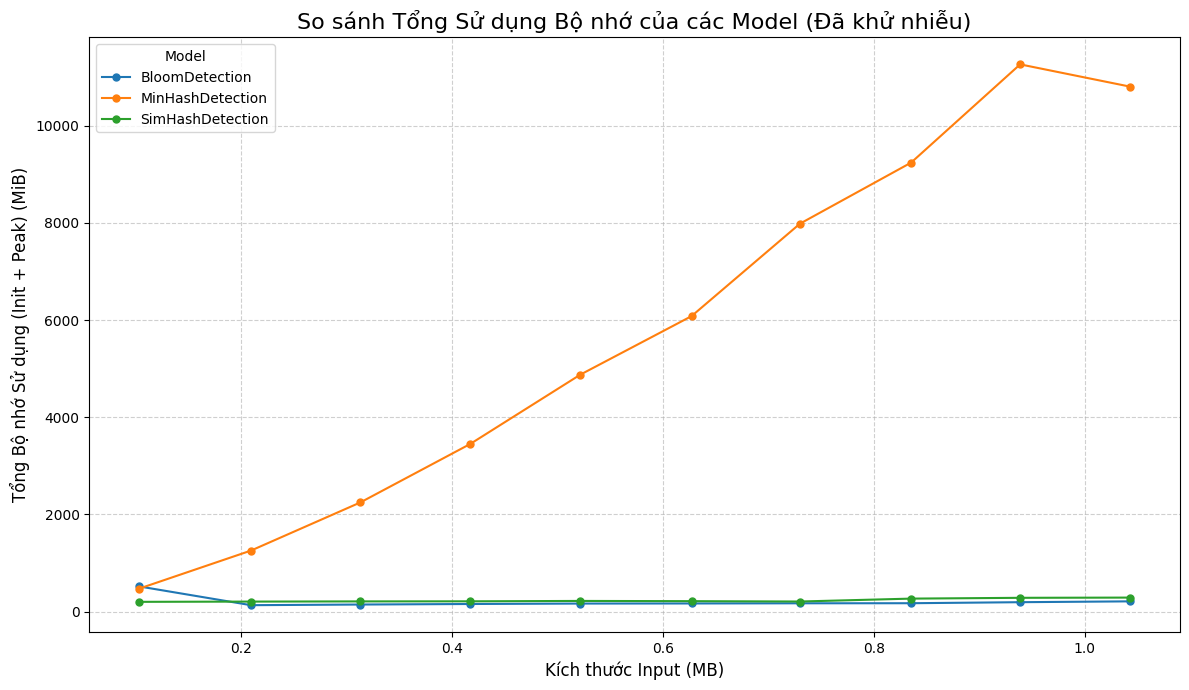

Hoàn tất.


In [3]:
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
import gc  # <--- THÊM THƯ VIỆN GARBAGE COLLECTOR

# ==============================================================================
# 1. KHAI BÁO MODEL VÀ DỮ LIỆU
# (Giả định bạn đã import BloomDetection, MinHashDetection, SimHashDetection, listText)
# ==============================================================================

# ==============================================================================
# 2. HÀM HELPER
# (Giữ nguyên)
# ==============================================================================
def get_list_size_mb(text_list: list) -> float:
    """
    Tính toán tổng kích thước bộ nhớ (tính bằng MB) của một danh sách các chuỗi.
    """
    total_bytes = sys.getsizeof(text_list)
    for s in text_list:
        total_bytes += sys.getsizeof(s)
    return total_bytes / (1024 * 1024)

# ==============================================================================
# 3. ĐO BỘ NHỚ KHỞI TẠO
# (Giữ nguyên)
# ==============================================================================

print("Đo lường bộ nhớ khởi tạo của Model (Init Memory)...")

# Hàm bọc (wrapper)
def init_model(model_class):
    return model_class()

# Đo lường
baseline_before_all = memory_usage()[0]
mem_usage_bloom = memory_usage((init_model, (BloomDetection,)), max_usage=True)
init_mem_bloom = mem_usage_bloom - baseline_before_all
# ... (Giống code cũ, đo cho MinHash và SimHash) ...
mem_usage_minhash = memory_usage((init_model, (MinHashDetection,)), max_usage=True)
init_mem_minhash = mem_usage_minhash - baseline_before_all
mem_usage_simhash = memory_usage((init_model, (SimHashDetection,)), max_usage=True)
init_mem_simhash = mem_usage_simhash - baseline_before_all

model_init_memory = {
    'BloomDetection': init_mem_bloom,
    'MinHashDetection': init_mem_minhash,
    'SimHashDetection': init_mem_simhash,
}
print(f"  - BloomDetection Init: {init_mem_bloom:.2f} MiB")
print(f"  - MinHashDetection Init: {init_mem_minhash:.2f} MiB")
print(f"  - SimHashDetection Init: {init_mem_simhash:.2f} MiB")

# Khởi tạo các model để sử dụng
print("\nKhởi tạo các model để chạy thử nghiệm...")
model1 = BloomDetection()
model2 = MinHashDetection()
model3 = SimHashDetection()
listModel = [model1, model2, model3]
model_names = ['BloomDetection', 'MinHashDetection', 'SimHashDetection']

print(f"Sử dụng {len(listText)} văn bản có sẵn.")

# ==============================================================================
# 4. CHẠY THỬ NGHIỆM VÀ ĐO LƯỜNG (ĐÃ CẬP NHẬT CHỐNG NHIỄU)
# ==============================================================================

results_list = []
num_steps = 10
# SỐ LẦN CHẠY ĐỂ LẤY TRUNG VỊ (Càng cao càng mượt nhưng càng chậm)
num_runs_per_step = 1
# Sửa lại range của bạn, tôi nhớ bạn muốn 1000 -> 10000
amounts_to_test = np.linspace(1000, 10000, num_steps, dtype=int)

print(f"\nBắt đầu đo lường trên {num_steps} bước (từ 1000 đến 10000)...")
print(f"Mỗi bước sẽ chạy {num_runs_per_step} lần để lấy trung vị (chống nhiễu).")

for amount in amounts_to_test:
    print(f"\n--- Đang xử lý {amount} văn bản ---")
    sub_list = listText[:amount]
    input_mb = get_list_size_mb(sub_list)
    
    for model, name in zip(listModel, model_names):
        print(f"  Đo lường Model: {name} (chạy {num_runs_per_step} lần)...")
        
        # Danh sách để lưu kết quả của N lần chạy
        run_increments = []
        
        for i in range(num_runs_per_step):
            try:
                # === GIẢI PHÁP 1: KIỂM SOÁT GARBAGE COLLECTOR ===
                gc.collect()  # 1. Dọn dẹp sạch trước khi đo
                gc.disable()  # 2. Tắt GC để nó không chạy ngẫu nhiên
                
                # Chạy đo lường
                mem_readings_tuple = memory_usage(
                    (model.detect, (sub_list,)),
                    interval=0.01,
                    timeout=120,
                    retval=True,
                    max_usage=False
                )
                
                gc.enable()  # 3. Bật lại GC sau khi đo xong

                # === Hết phần kiểm soát GC ===
                
                mem_readings = mem_readings_tuple[0]
                
                if not mem_readings:
                    print(f"    Lần chạy {i+1} LỖI: Không thể đo lường.")
                    continue
                    
                # Tính toán mức tăng
                peak_mem = max(mem_readings)
                baseline_mem = mem_readings[0]
                mem_increment = peak_mem - baseline_mem
                
                # Thêm vào danh sách để lấy trung vị
                run_increments.append(mem_increment)

            except Exception as e:
                gc.enable() # Đảm bảo GC được bật lại nếu có lỗi
                print(f"    Lần chạy {i+1} LỖI: {e}")
        
        # === GIẢI PHÁP 2: LẤY TRUNG VỊ (MEDIAN) ===
        if not run_increments:
            print(f"    LỖI: Tất cả {num_runs_per_step} lần chạy cho {name} đều thất bại.")
            continue
        
        # Tính trung vị của các mức tăng
        median_increment = np.median(run_increments)
        
        # Tính tổng bộ nhớ (Init + Median)
        init_memory = model_init_memory[name]
        total_memory_used = init_memory + median_increment
        
        # 3. Lưu kết quả
        results_list.append({
            'Model': name,
            'Amount': amount,
            'Input (MB)': input_mb,
            'Memory (MiB)': total_memory_used
        })
        
        print(f"    -> Input: {input_mb:.2f} MB, "
              f"Init: {init_memory:.2f} MiB, "
              f"Detect Incr (Median): {median_increment:.2f} MiB, "
              f"Tổng: {total_memory_used:.2f} MiB")

# ==============================================================================
# 5. VẼ BIỂU ĐỒ ĐƯỜNG
# (Giữ nguyên)
# ==============================================================================

print("\nTính toán hoàn tất. Đang vẽ biểu đồ...")
df_results = pd.DataFrame(results_list)

if df_results.empty:
    print("Không có dữ liệu để vẽ.")
else:
    print("\n--- Kết quả đo lường (5 dòng đầu) ---")
    print(df_results.head())

    fig, ax = plt.subplots(figsize=(12, 7))
    
    ax.set_title("So sánh Tổng Sử dụng Bộ nhớ của các Model (Đã khử nhiễu)", fontsize=16)
    ax.set_xlabel("Kích thước Input (MB)", fontsize=12)
    ax.set_ylabel("Tổng Bộ nhớ Sử dụng (Init + Peak) (MiB)", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

    for name in model_names:
        model_df = df_results[df_results['Model'] == name]
        if not model_df.empty:
            model_df = model_df.sort_values(by='Input (MB)')
            ax.plot(
                model_df['Input (MB)'], 
                model_df['Memory (MiB)'], 
                marker='o', 
                markersize=5, 
                label=name
            )

    ax.legend(title="Model")
    plt.tight_layout()
    print("\nHiển thị biểu đồ. Đóng cửa sổ biểu đồ để kết thúc.")
    plt.show()

print("Hoàn tất.")


Tính toán hoàn tất. Đang vẽ biểu đồ...

--- Kết quả đo lường (5 dòng đầu) ---
               Model  Amount  Input (MB)  Memory (MiB)
0     BloomDetection    1000    0.102723    521.312500
1   MinHashDetection    1000    0.102723    472.863281
2   SimHashDetection    1000    0.102723    203.132812
3     BloomDetection    2000    0.209145    134.484375
4   MinHashDetection    2000    0.209145   1257.750000
5   SimHashDetection    2000    0.209145    208.410156
6     BloomDetection    3000    0.312942    147.855469
7   MinHashDetection    3000    0.312942   2248.355469
8   SimHashDetection    3000    0.312942    212.371094
9     BloomDetection    4000    0.417063    158.742188
10  MinHashDetection    4000    0.417063   3449.863281
11  SimHashDetection    4000    0.417063    213.968750
12    BloomDetection    5000    0.521635    167.777344
13  MinHashDetection    5000    0.521635   4877.156250
14  SimHashDetection    5000    0.521635    221.886719
15    BloomDetection    6000    0.627106 

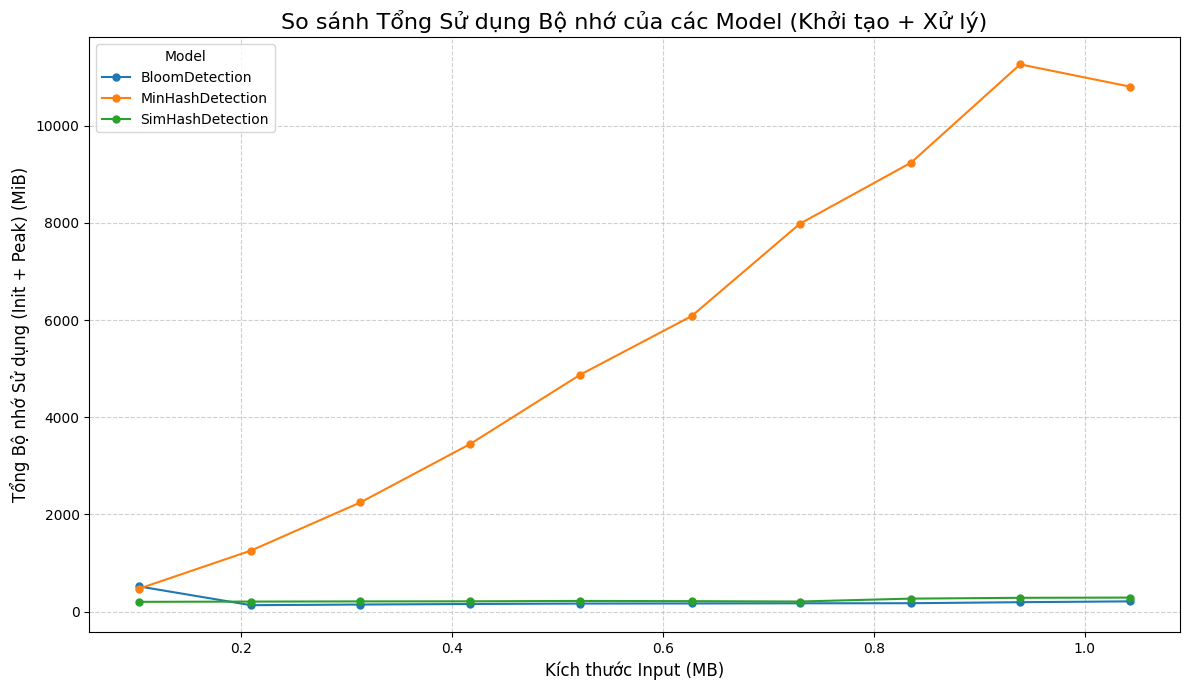

Hoàn tất.


In [4]:
# ==============================================================================
# 5. VẼ BIỂU ĐỒ ĐƯỜNG
# ==============================================================================

print("\nTính toán hoàn tất. Đang vẽ biểu đồ...")
df_results = pd.DataFrame(results_list)

if df_results.empty:
    print("Không có dữ liệu để vẽ. Đã xảy ra lỗi trong quá trình đo lường.")
else:
    print("\n--- Kết quả đo lường (5 dòng đầu) ---")
    print(df_results.head(30))

    # Khởi tạo figure
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Cập nhật tiêu đề và trục Y
    ax.set_title("So sánh Tổng Sử dụng Bộ nhớ của các Model (Khởi tạo + Xử lý)", fontsize=16)
    # Trục X là Kích thước Input (MB)
    ax.set_xlabel("Kích thước Input (MB)", fontsize=12)
    # Trục Y là TỔNG bộ nhớ (MiB)
    ax.set_ylabel("Tổng Bộ nhớ Sử dụng (Init + Peak) (MiB)", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

    # Vẽ từng đường cho mỗi model
    for name in model_names:
        model_df = df_results[df_results['Model'] == name]
        if not model_df.empty:
            # Sắp xếp theo Input (MB) để đảm bảo đường vẽ đúng
            model_df = model_df.sort_values(by='Input (MB)')
            ax.plot(
                model_df['Input (MB)'], 
                model_df['Memory (MiB)'], 
                marker='o', 
                markersize=5, 
                label=name
            )

    ax.legend(title="Model")
    plt.tight_layout()
    
    # Hiển thị biểu đồ
    print("\nHiển thị biểu đồ. Đóng cửa sổ biểu đồ để kết thúc.")
    plt.show()

print("Hoàn tất.")